Fitting amplitudes using scipy wrapper library [lmfit](https://lmfit.github.io/lmfit-py/)

In [104]:
from lmfit import Parameters

paramsR = Parameters()
paramsL = Parameters()
paramsC = Parameters()
# paramsR.add('R_r',96.7, min=950, max=1100)
# paramsR.add('R',.17252e+03, min=1e03, max=3e03)
# paramsR.add('L',.741e-02, min=3.6e-02, max=5.5e-02)
# paramsR.add('C',.46e-09, min=1e-09, max=2e-09)
# paramsR.add('V_0'.2,min=1, max=2)
paramsR.add('R_r',996.7, min=950, max=1500)
paramsR.add('R',min=1.5e03, max=3e03)
paramsR.add('L',4.741e-02, min=3.0e-02, max=5.5e-02)
paramsR.add('C',1.46e-09, min=1e-09, max=2e-09)
paramsR.add('V_0',1.5,min=0.0,max=3.0)

paramsL.add('R',min=1.5e03, max=3e03)
paramsL.add('L',4.741e-02, min=3.0e-02, max=5.5e-02)
paramsL.add('C',1.46e-09, min=1e-09, max=2e-09)
paramsL.add('V_0',1.5,min=0.0,max=3.0)

paramsC.add('R',min=1.5e03, max=3e03)
paramsC.add('L',4.741e-02, min=3.0e-02, max=5.5e-02)
paramsC.add('C',1.46e-09, min=1e-09, max=2e-09)
paramsC.add('V_0',1.5,min=0.0,max=3.0)


R

[[Model]]
    Model(R_amp_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 22
    # data points      = 986
    # variables        = 5
    chi-square         = 0.70499524
    reduced chi-square = 7.1865e-04
    Akaike info crit   = -7131.81549
    Bayesian info crit = -7107.34721
[[Variables]]
    R_r:  1177.69336 +/- 14302420.5 (1214443.51%) (init = 996.7)
    R:    1568.18218 +/- 540.529952 (34.47%) (init = 1500)
    L:    0.03643646 +/- 0.01384700 (38.00%) (init = 0.04741)
    C:    1.8934e-09 +/- 7.1968e-10 (38.01%) (init = 1.46e-09)
    V_0:  1.63369333 +/- 19840.2927 (1214444.13%) (init = 1.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(R_r, V_0) = -1.000
    C(L, C)     = -1.000
    C(R, L)     = 1.000
    C(R, C)     = -1.000
L

[[Model]]
    Model(L_amp_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 52
    # data points      = 986
    # variables        = 4
    chi-square         = 2.536

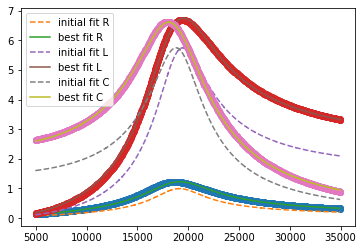

In [105]:
import numpy as np

import matplotlib.pyplot as plt
from numpy import exp, loadtxt, pi, sqrt

from lmfit import Model

file_folder = 'data/actual data/Frequency response/'
file_name = 'amplitudes1.csv'
data_file = file_folder + file_name
x,ampGen,ampR,ampL,ampC  = np.loadtxt(data_file, delimiter = ',', skiprows = 1, usecols = (0,1,2,3,4), unpack = True)

def R_amp_model(x, R_r , R, L, C, V_0):
    num = R_r * V_0
    den = np.sqrt( R**2 + (2*np.pi*x* L - 1/(2*np.pi*x* C))**2)
    return num / den
def L_amp_model(x, R, L, C, V_0):
    num = 2*np.pi*x *L * V_0
    den = np.sqrt( R**2 + (2*np.pi*x *L - 1/(2*np.pi*x *C))**2)
    return num / den
def C_amp_model(x, R, L, C, V_0):
    num = V_0 / (2*np.pi*x *C)
    den = np.sqrt( R**2 + (2*np.pi*x *L - 1/(2*np.pi*x *C))**2)
    return num / den

Rmodel = Model(R_amp_model)
Lmodel = Model(L_amp_model)
Cmodel = Model(C_amp_model)

resultR = Rmodel.fit(ampR,x=x,params=paramsR)
resultL = Lmodel.fit(ampL,x=x,params=paramsL)
resultC = Cmodel.fit(ampC,x=x,params=paramsC)

print('R\n')
print(resultR.fit_report())
print('L\n')
print(resultL.fit_report())
print('C\n')
print(resultC.fit_report())
plt.plot(x, ampR, 'o')
plt.plot(x, resultR.init_fit, '--', label='initial fit R')
plt.plot(x, resultR.best_fit, '-', label='best fit R')
plt.plot(x, ampL, 'o')
plt.plot(x, resultL.init_fit, '--', label='initial fit L')
plt.plot(x, resultL.best_fit, '-', label='best fit L')
plt.plot(x, ampC, 'o')
plt.plot(x, resultC.init_fit, '--', label='initial fit C')
plt.plot(x, resultC.best_fit, '-', label='best fit C')
plt.legend()

plt.savefig('figs/amplitudes.pdf')
plt.show()


In [106]:
# paramsR = resultR.params
# paramsL = resultL.params
# paramsC = resultC.params
#
# resultR = Rmodel.fit(ampR,x=x,params=paramsR)
# resultL = Lmodel.fit(ampL,x=x,params=paramsL)
# resultC = Cmodel.fit(ampC,x=x,params=paramsC)
#
# print('R\n')
# print(resultR.fit_report())
# print('L\n')
# print(resultL.fit_report())
# print('C\n')
# print(resultC.fit_report())
# plt.plot(x, ampR, 'o')
# plt.plot(x, resultR.init_fit, '--', label='initial fit R')
# plt.plot(x, resultR.best_fit, '-', label='best fit R')
# plt.plot(x, ampL, 'o')
# plt.plot(x, resultL.init_fit, '--', label='initial fit L')
# plt.plot(x, resultL.best_fit, '-', label='best fit L')
# plt.plot(x, ampC, 'o')
# plt.plot(x, resultC.init_fit, '--', label='initial fit C')
# plt.plot(x, resultC.best_fit, '-', label='best fit C')
# plt.legend()
#
# plt.savefig('figs/amplitudes.pdf')
# plt.show()